In [7]:
# Import 3rd-party frameworks.

from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import time as tm
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [8]:
from Mike_NB_01 import *

In [9]:
# Import the Bot engine.
import sys 
sys.path.append('..')
from ___Engine import *
Engine.ChooseMode(stream=False, show_stream=False, demisser=False, show_demosser=False, traders=True, show_tranders=False, present=True )

engine = Engine()
engine.Start(Config['structure'], Config['timing'])

bn = None
if len(engine.exchanges) > 0:
    bn = engine.exchanges[0]  # Binance exchange

====== Bot: engine is created.
====== Bot: engine is starting...
====== Bot: Traders, and their strategies/indicators, are created.
====== Bot: Traders, and their strategies/indicators, are running...


In [10]:
# Get_Price_Data_By_Time function seamlessly collects/creates price candles from Binance.

start = datetime(2023, 1, 4)    # Any datetime. Note Binance started operation in July 2017.
end = datetime(2023, 3, 30, 23, 59)     # Any datetime
symbol = "XRPUSDT"      # Any pair listed on Binance.
interval = "1m"         # in '1m', '3m', '5m', '15m', '30m', '1h', '2h', '4h', '6h', '8h', '12h', '1d'.  (excludes: '3d', '1w')
prePad = True           # prepend with null candles.
#------------------------------------------------------------------------------------------------------------------
candles, nFills, successful, _, reason = bn.Get_Price_Data_By_Time("klines", symbol, interval, start, end, prePad=prePad)
print(reason)
if successful:          # price is a numpy array.
    print("\n!!!!!!!!!! (nCandles, nAttributes) = {}, nCreated = {}".format(candles.shape, nFills))


Get_Price: klines.XRPUSDT.1m.2023-01-04 00:00:00.2023-03-30 23:59:00
Extrapolated candles will be created if initial candles are not available...

!!!!!!!!!! (nCandles, nAttributes) = (123840, 12), nCreated = 80


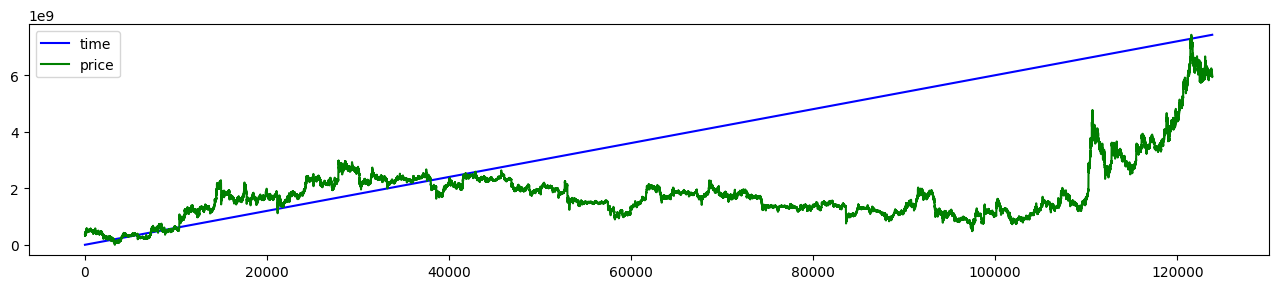

In [13]:
series = [
    [candles[:, 0], "time", "b"], [candles[:, 4], "price", "g"]
]
PoltNormalized("", series)

In [5]:
# Get_Price_Data_By_Time_Batch function executes a batch of Get_Price_Data_By_Time calls.

start = datetime(2023, 1, 1)
end = datetime(2023, 3, 16)
symbols = ["BTCUSDT", "ETHUSDT"]    # Be careful with market symbols.
interval = "1m"
#-------------------------------------------------------------------------------------------------------
table, nFills, successful_symbols, succesful, = bn.Get_Price_Data_By_Time_Batch("klines", symbols, interval, start, end)
if succesful:   # table is a numpy array.
    print("\n!!!!!!!!!! (nMarkets, nCandles, nAttributes) = {}, nCreated = {}".format(table.shape, nFills))
    print("\n!!!!!!!!!! successful: {}".format(successful_symbols))

Walking through the list...

Get_Price: klines.BTCUSDT.1m.2023-01-01 00:00:00.2023-03-16 00:00:00
Extrapolated candles will be created if initial candles are not available...
Get_Price: klines.ETHUSDT.1m.2023-01-01 00:00:00.2023-03-16 00:00:00
Extrapolated candles will be created if initial candles are not available...
Successful for 2/2 markets

!!!!!!!!!! (nMarkets, nCandles, nAttributes) = (2, 106561, 12), nCreated = 0

!!!!!!!!!! successful: ['BTCUSDT: 106561, 0 created. Success.', 'ETHUSDT: 106561, 0 created. Success.']


In [6]:
# Assess if event-free series has significance, and at what sigma values.

smallSigma = 3
largeSigma = 60
nLatest = 1440 * 10   # the number of candles to show.
#-----------------------------------------------------------------
Event_Free_Learning_Scheme(candles, smallSigma, largeSigma, nLatest)

ValueError: a cannot be empty

In [ ]:
# Guess the best sigma for price and volume

pSigma = 1
vSigma = 1
nLatest = 100  # minutes in a day.
#-------------------------------------------------------------------
Show_Price_Volum(candles, pSigma, vSigma, nLatest)

In [ ]:
# Get the latest pirces, so quickly as to draw and monitor all 330 -/USDT markets on Binance in real time.
# Note: It will not work during its a few minutes of warming-up period.

nLatest = 2 #3000000    # number of latest cached candles. It's completely normal if one less candles are returned.
#--------------------------------------------------------------

end = datetime.now() # datetime(2023, 2, 20)
start = end - timedelta(minutes=nLatest-1, hours=0)
symbol = "ETHUSDT"; interval = "1m"
cachedCandles = bn.Get_Cached_Price("klines", symbol, interval, start)
if cachedCandles is not None:
    series = [ (cachedCandles[:,4], "price", "b") ]
    ShowSingle("Latest {} prices.".format(cachedCandles.shape[0]), [(cachedCandles[:,4], "price", "b")])

In [ ]:
# Logarithm for placeholder candles ...

In [ ]:
# Visualization 01

In [ ]:
ready = bn.gstreams_ready
keys = []
while len(keys) < 320:
    tm.sleep(3)
    keys = bn.gstreams.keys()
print(ready, len(keys))

In [ ]:
# Get_Price_Data_By_Time_Batch function executes a batch of Get_Price_Data_By_Time calls.

start = datetime(2018, 1, 1)
end = datetime(2023, 3, 26, 23, 59, 59)

keys = bn.gstreams.keys()
symbols = []
for key in keys:
    (dataType, symbol, interval) = key.split('.')
    symbols.append(symbol)
print(symbols, len(symbols))

interval = "1m"
#-------------------------------------------------------------------------------------------------------
table, nFills, reports, succesful = bn.Get_Price_Data_By_Time_Batch("klines", symbols, interval, start, end, lookup=True)
if succesful:   # table is a numpy array.
    print("\n!!!!!!!!!! (nMarkets, nCandles, nAttributes) = {}, nCreated = {}".format(table.shape, nFills))
print("\n!!!!!!!!!! successful: {}".format(successful_symbols))


In [ ]:
file_id = "08_all"

print("table: {}".format(table.shape))
np.save(os.path.join( Config['BinanceCandlesNumpy'], "table_" + file_id), table)
import json
with open(os.path.join( Config['BinanceCandlesNumpy'], "reports_" + file_id + ".json"), "w") as f:
    f.write(json.dumps(reports))

In [ ]:
table = np.load( os.path.join( Config['BinanceCandlesNumpy'], "table_" + file_id + ".npy") )
print("table: {}".format(table.shape))
table_markets = []
with open( os.path.join( Config['BinanceCandlesNumpy'], "reports_" + file_id + ".json"), "r") as f:
    reports = json.loads(f.read())
print(reports)